<h2> Organizar e Obter </h2>

<h4> 1. Obtenção de dados da web </h4>

In [ ]:
import urllib.request, urllib.parse, urllib.error
import bs4
import ssl
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
class obteinDada():
    
    def __init__(self):
        self._ctx = ssl.create_default_context()
        self._ctx.check_hostname = False 
        self._ctx.verify_mode = ssl.CERT_NONE
        
# ============================================================================================================================
#                                                        Web Scapping
# ============================================================================================================================

    def getHtml(self, link):
        html = urllib.request.urlopen(link, context = self._ctx).read()
        
        return html 
    
    def cleanHtml(self, html):
        soup = bs4.BeautifulSoup(html, "html.parser")
        
        return soup
        
    def printDada(self, fhand):
        for line in fhand:
            print(line.decode().strip())

# ============================================================================================================================
#                                                            API's
# ============================================================================================================================

    def getDataName(self):
        nData = int(input("Escolha o número de dados a serem extraídos: "))
        
        dataNames = list()
        
        for n in range(nData):
            dataNames.append(input("Codigo do dado desejado: "))
            
        return dataNames
            
    def getBCBAPI(self, dataName, startDate = None, finalDate = None):
        if len(dataName) < 1: return 0
        
        if (startDate != None) and (finalDate != None):
            url = "http://api.bcb.gov.br/dados/serie/bcdata.sgs." + dataName + "/dados?formato=json&dataInicial=" + startDate + "&dataFinal=" + finalDate
            
        else:
            url = "http://api.bcb.gov.br/dados/serie/bcdata.sgs." + dataName + "/dados?formato=json"
            
        request = urllib.request.urlopen(url)
            
        data = request.read().decode()
            
        try:
            js = json.loads(data)
                
        except:
            js = None
                
        if (js == None):
            return("======================== Failure to Retrieve ========================")
            
        df = pd.read_json(data)\
             .assign(data = lambda cols: pd.to_datetime(cols["data"]))\
             .assign(valor = lambda cols: cols["valor"].astype(float))
            
        return df


    def getFredAPI(self, dataName, startDate, finalDate, units):
        keyAPI = "dfe46b440e15482065a1f96b4d3dbc2b"
        
        url = "https://api.stlouisfed.org/fred/series/observations" + "?series_id=" + dataName + "&api_key=" + keyAPI + "&file_type=json" + "&observation_start=" + startDate + "&observation_end=" + finalDate + "&units=" + units
        
        uh = urllib.request.urlopen(url)
            
        data = uh.read().decode()
            
        try:
            js = json.loads(data)
                
        except:
            js = None
                
        if (js == None):
            return("======================== Failure to Retrieve ========================")
          
        df = pd.DataFrame(js["observations"])[["date", "value"]]\
               .assign(date = lambda cols: pd.to_datetime(cols["date"]))\
               .assign(value = lambda cols: cols["value"].astype(float))\
               .rename(columns = {"value":dataName})
        
        return df

# ============================================================================================================================
#                                                       Plot functions
# ============================================================================================================================

    def plotLinearDfs(self, df):   
        plt.figure(figsize = (20, 10))
        linear = plt.plot(df.iloc[:, 0].values, df.iloc[:, 1].values, linewidth = 3, color = "red", alpha = 0.5)
        
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(60)

        plt.gca().spines[:].set_visible(False)
        plt.show()
        
    def plotGridSpec(self, nPlots):
        plt.figure(figsize = (20, 10))
        
        if ((nPlots % 2) == 0):
            gspec = gridspec.GridSpec((nPlots / 2), 2, hspace = 0.9)
        
        elif (nPlots > 1):
            gspec = gridspec.GridSpec(((nPlots + 1) / 2), 2, hspace = 0.9)

        
        
# ============================================================================================================================
#                                                           Main
# ============================================================================================================================

    def main(self):
        
        while (True):
            API = input("Escolha qual dos API's voce deseja coletar os dados (BCB ou Fred): ")
            
            if (len(API) < 1): break

            if (API == "BCB"):
                dataName = input("\nQual o nome da serie a ser coletada: ")
                
                df = self.getBCBAPI(dataName = dataName)
                
            elif (API == "Fred"):
                dataName = input("\nQual o nome da serie a ser coletada: ")
                
                startDate = input("\nQual a data de início desejada: ")
                
                finalDate = input("\nQual a data final desejada: ")
                
                units = input("\nQual a unidade desejada: ")
                
                df = self.getFredAPI(dataName = dataName, startDate = startDate, 
                                     finalDate = finalDate, units = units)
                
            else:
                print("\nErro! Escolha uma das opções entre parenteses!\n")
                continue

            self.plotLinearDfs(df)

In [ ]:
model = obteinDada()

Escolha qual dos API's voce deseja coletar os dados (BCB ou Fred):  BCB

Qual o nome da serie a ser coletada:  433


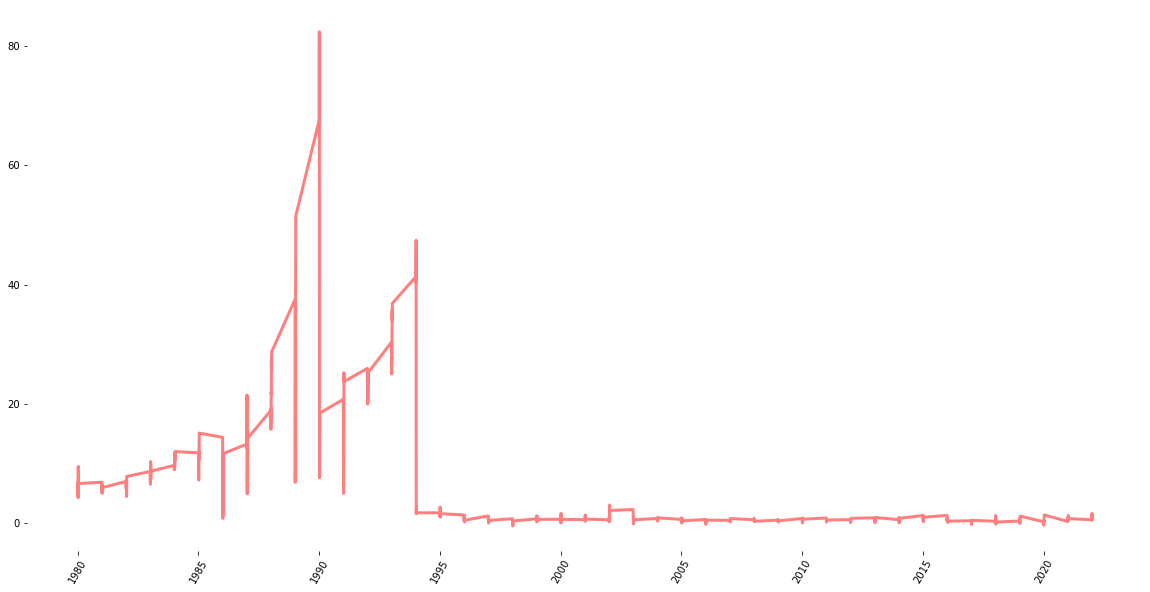

Escolha qual dos API's voce deseja coletar os dados (BCB ou Fred):  BCB

Qual o nome da serie a ser coletada:  169


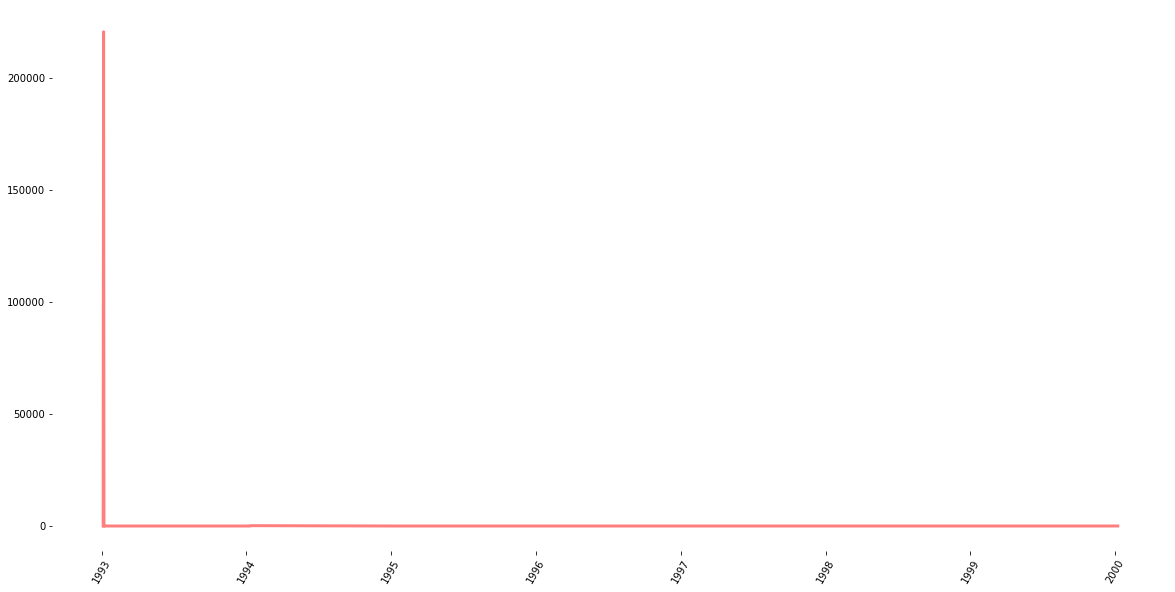

Escolha qual dos API's voce deseja coletar os dados (BCB ou Fred):  d



Erro! Escolha uma das opções entre parenteses!



KeyboardInterrupt: Interrupted by user

In [278]:
model.main()

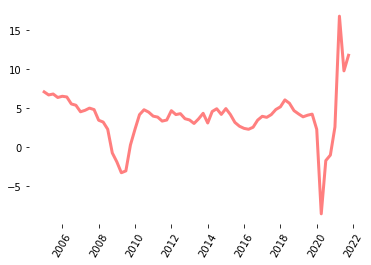

In [265]:
model.plotLinearDfs(df)

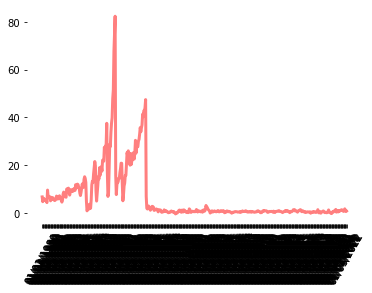

In [173]:
model.plotLinearDfs(df)

In [147]:
df.iloc[:, 0]

0      01/01/1980
1      01/02/1980
2      01/03/1980
3      01/04/1980
4      01/05/1980
          ...    
505    01/02/2022
506    01/03/2022
507    01/04/2022
508    01/05/2022
509    01/06/2022
Name: data, Length: 510, dtype: object

In [95]:
df.iloc[: , 0].values.shape

(510,)